In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D

## 1. Generate dataset

In [2]:
# make the dataset
N = 1000
# uniformly distributed between (-3, 3)
X = np.random.random(size=(N,2)) * 6 - 3

In [4]:
X.shape

(1000, 2)

In [5]:
# this implements the function y = cos(2x_1) + cos(3x_2)
Y = np.cos(2*X[:,0]) + np.cos(3*X[:,1])

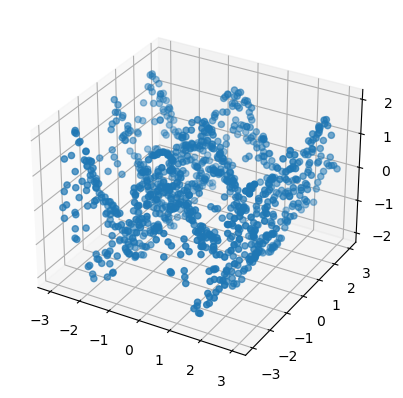

In [6]:
# plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], Y)
plt.show()

## 2. Build the model

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, input_shape=(2,), activation='relu'),
    tf.keras.layers.Dense(1)
])

In [8]:
# compile model
opt = tf.keras.optimizers.Adam(0.01)
model.compile(optimizer=opt, loss='mse')

## 3. Train model

In [9]:
r = model.fit(X, Y, epochs=100)

Epoch 1/100
32/32 [==============================] - 0s 1ms/step - loss: 0.9638
Epoch 2/100
32/32 [==============================] - 0s 673us/step - loss: 0.8950
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 0.8882
Epoch 4/100
32/32 [==============================] - 0s 767us/step - loss: 0.8633
Epoch 5/100
32/32 [==============================] - 0s 796us/step - loss: 0.8204
Epoch 6/100
32/32 [==============================] - 0s 778us/step - loss: 0.7544
Epoch 7/100
32/32 [==============================] - 0s 820us/step - loss: 0.7425
Epoch 8/100
32/32 [==============================] - 0s 782us/step - loss: 0.6517
Epoch 9/100
32/32 [==============================] - 0s 777us/step - loss: 0.6590
Epoch 10/100
32/32 [==============================] - 0s 715us/step - loss: 0.5523
Epoch 11/100
32/32 [==============================] - 0s 880us/step - loss: 0.5424
Epoch 12/100
32/32 [==============================] - 0s 840us/step - loss: 0.5256
Epoch 13/100
32/3

32/32 [==============================] - 0s 710us/step - loss: 0.0144


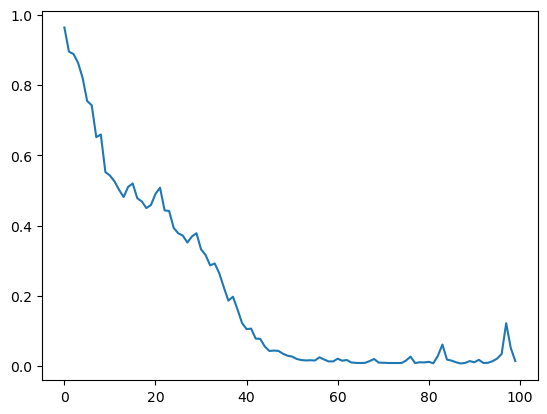

In [10]:
# plot the loss
plt.plot(r.history['loss'], label='loss')

79/79 [==============================] - 0s 519us/step


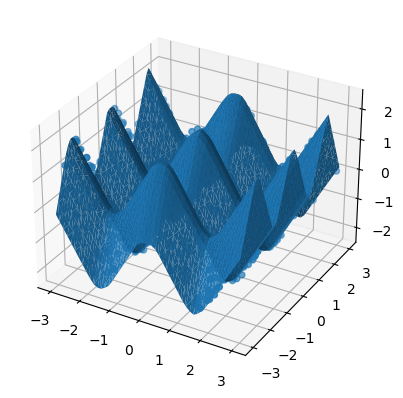

In [12]:
# plot prediction surface
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], Y)

# surface plot
line = np.linspace(-3,3,50)
xx, yy = np.meshgrid(line, line)
Xgrid = np.vstack((xx.flatten(), yy.flatten())).T
Yhat = model.predict(Xgrid).flatten()
ax.plot_trisurf(Xgrid[:,0], Xgrid[:,1], Yhat, linewidth=0.2, antialiased=True)
plt.show()

## 4. Save model

In [13]:
model.save('regression_ann.h5')